<a href="https://colab.research.google.com/github/devesssi/EDUNNET/blob/main/ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential  # Build NN
from tensorflow.keras.layers import Dense  # creating layers

In [16]:
# lets read a file
df= pd.read_csv("green_tech_data.csv")
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [18]:
#seperate X and Y
# but X has to be in array.
# Y has to be 1D array and there will be only 1 op column
x= df.iloc[:, 0:-1 ].values
x

# [:,0:-1] here  : stands for all rows and 0:-1 used to fetch 0th column to last column but last column
# will be excluded.

# .values is a property to convert your data into array.


# we converted the data of x and y in array to use numpy for numerical calc


array([[1.81089042e+02, 1.28286267e+02, 6.42031646e-01, 7.32567745e-01],
       [3.82750007e+02, 6.72769370e+02, 8.41399650e-02, 2.89109584e+00],
       [3.06197880e+02, 3.82920383e+02, 1.61628714e-01, 2.93285805e+00],
       [2.59530469e+02, 5.57713622e+02, 8.98554189e-01, 3.36843456e+00],
       [1.04606524e+02, 9.16809827e+02, 6.06429060e-01, 3.76741100e+00],
       [1.04598082e+02, 3.24363006e+02, 9.19705162e-03, 4.89133436e+00],
       [7.03292643e+01, 4.69344631e+02, 1.01471543e-01, 2.82335157e+00],
       [3.53161651e+02, 7.79996025e+02, 6.63501769e-01, 1.95330413e+00],
       [2.60390254e+02, 3.05918349e+02, 5.06158385e-03, 4.07833788e+00],
       [2.97825402e+02, 1.69281919e+02, 1.60808051e-01, 1.71874513e+00],
       [5.72045730e+01, 3.60776308e+02, 5.48733789e-01, 2.47537139e+00],
       [3.89468448e+02, 2.45099159e+02, 6.91895198e-01, 8.53053716e-01],
       [3.41354924e+02, 9.36727887e+02, 6.51961260e-01, 6.14078345e-01],
       [1.24318689e+02, 8.27308342e+02, 2.24269309e

In [19]:
y= df["sustainability"].values
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# look scaling is very imp to use in ANN
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[-3.23112154e-01, -1.59922959e+00,  4.26196271e-01,
        -1.50512126e+00],
       [ 1.62343393e+00,  4.75167094e-01, -1.48468335e+00,
         1.37699554e-01],
       [ 8.84509348e-01, -6.29112862e-01, -1.21927041e+00,
         1.69484093e-01],
       [ 4.34049022e-01,  3.68224313e-02,  1.30483224e+00,
         5.00994328e-01],
       [-1.06136481e+00,  1.40492361e+00,  3.04250992e-01,
         8.04648847e-01],
       [-1.06144630e+00, -8.52207440e-01, -1.74137635e+00,
         1.66004873e+00],
       [-1.39222838e+00, -2.99849802e-01, -1.42531957e+00,
         8.61404823e-02],
       [ 1.33783032e+00,  8.83684116e-01,  4.99735314e-01,
        -5.76038550e-01],
       [ 4.42348151e-01, -9.22478740e-01, -1.75554107e+00,
         1.04129026e+00],
       [ 8.03693445e-01, -1.44304247e+00, -1.22208133e+00,
        -7.54557609e-01],
       [-1.51891535e+00, -7.13478375e-01,  1.06634285e-01,
        -1.78701599e-01],
       [ 1.68828413e+00, -1.15419048e+00,  5.96987928e-01,
      

In [21]:
# split a data into trainig and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
# lets build ANN model

# init a model
ann = Sequential()

# create and add Hidden layer
ann.add(Dense(units=8, activation="relu"))  #HL
ann.add(Dense(units=16, activation="relu"))  #HL

#lets create op layer
ann.add(Dense(units=1, activation="sigmoid"))  #op  # for multiclassification keep softmax as

#for binary classification keep units to 1
#for example if output column has two unique values -: YES ,NO then keep units =1

# for multiclassification keep units to number of unique values in output column
# for example if output column has three unique values -: YES ,NO, MAYBE then keep the units =3

In [23]:
# writing code for optimization
ann.compile("adam",loss='binary_crossentropy',metrics=['accuracy'])

# adam is the optimiser used in the algo a

# keep loss to "sparse_categorical_crossentropy" for multi classification if it geenrates
#error then keep categorical_crossentropy

In [24]:
#train a model
ann.fit(xtrain,ytrain,epochs=20, batch_size=32)

# batchsize is the no of the data sent in a go to the ann (model)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8430 - loss: 0.5589
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8391 - loss: 0.5511
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8352 - loss: 0.5469
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8430 - loss: 0.5228
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8430 - loss: 0.5137
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8273 - loss: 0.5120
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8547 - loss: 0.4888
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8547 - loss: 0.4772
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8352 - loss: 0.4833 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8586 - loss: 0.4650
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8547 - loss: 0.4618
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8703 - loss: 0.4262


In [25]:
# predicting xtest but ans wont be mentioned in 0 and 1. ouput of this code
# will be the ans produced by sigmoid function.
# we need to setup threshold later on.

# this op is the probabilty given by the model known as logits that are raw op
ypred=ann.predict(xtest)
ypred


# we can use argmax function in the multiclass function which will give the  max probability from the given probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.09939207],
       [0.15183504],
       [0.2060778 ],
       [0.34357375],
       [0.10952868],
       [0.18790798],
       [0.1069722 ],
       [0.25275677],
       [0.16141352],
       [0.36010095],
       [0.23404184],
       [0.37314305],
       [0.35562047],
       [0.17229271],
       [0.03085402],
       [0.29852495],
       [0.36317775],
       [0.3666534 ],
       [0.1347449 ],
       [0.14187382]], dtype=float32)

In [26]:
# setting up threshold to classify it into 0 and 1
final_pred=np.where(ypred>0.5,1,0)
final_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [27]:
# predicting user defined data
ann.predict(np.array([[306.197880,382.920383,0.161629,2.932858]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.]], dtype=float32)

In [28]:


# Training history
history = ann.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))




Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8313 - loss: 0.4023 - val_accuracy: 0.8500 - val_loss: 0.3950
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8469 - loss: 0.3845 - val_accuracy: 0.8500 - val_loss: 0.3905
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8273 - loss: 0.3852 - val_accuracy: 0.8500 - val_loss: 0.3862
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8664 - loss: 0.3603 - val_accuracy: 0.8500 - val_loss: 0.3820
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8352 - loss: 0.3809 - val_accuracy: 0.8500 - val_loss: 0.3781
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8586 - loss: 0.3599 - val_accuracy: 0.8500 - val_loss: 0.3742
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8664 - loss: 0.3372 - val_accuracy: 0.8500 - val_loss: 0.3703
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8547 - loss: 0.3459 - val_accuracy: 0.8500 - val_loss: 0.3666

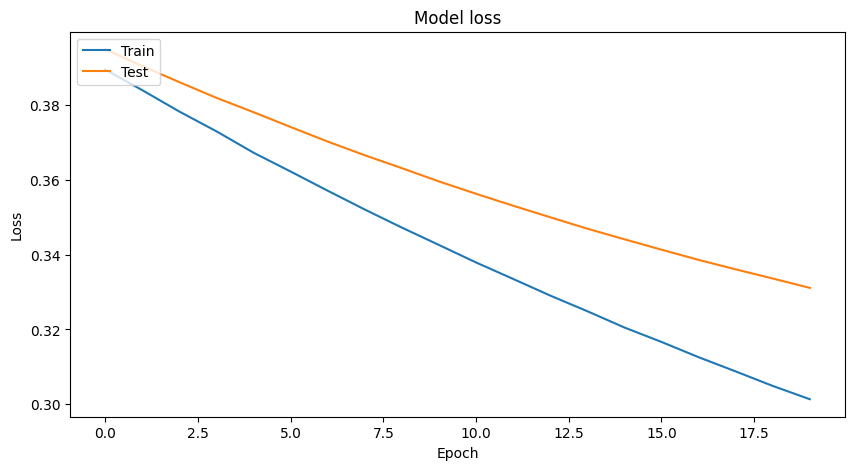

In [29]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])   #training loss
plt.plot(history.history['val_loss']) #validation
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
ypred[0]

array([0.09939207], dtype=float32)

In [31]:
final_ypred = np.argmax(ypred, axis=1)
final_pred


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])